# sklearn チートシート

In [26]:
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns

# データセットの準備

## Irisデータ
3クラス、4特徴量でお手頃

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


## Breast Cancer wisconsinのデータセット
2クラス30特徴量

In [2]:
import urllib
try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)
except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
print('rows, columns:', df.shape)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.iloc[:,2:]
y=df.iloc[:,1]
y=le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Boston Housingデータ
回帰モデル、13特徴量

In [152]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df.head())

X=df.iloc[:,:df.shape[1]-1]
y=df['MEDV']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 線形分離不可能
2クラスなので物足りないかも

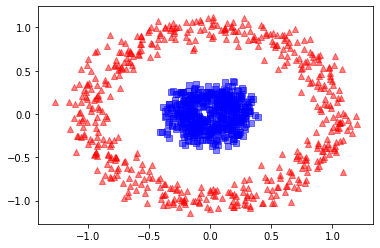

In [10]:
# 線形分離不可能なデータセットを作成
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='s',alpha=0.5)
plt.show()

## @ from sklearn import datasets
### iris=datasets.load_iris()        data=iris.data label=iris.target
有名なデータセットのダウンロードをできる。特徴量はdata　正解ラベルはtargetでアクセスできる

In [26]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.data[:5])
print(iris.target[:5])
print(iris['data'][:5])
print(iris['target'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


## @ from sklearn.model_selection import train_test_split
### X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
学習データを訓練データとテストテストデータに分ける

In [39]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape)
print(y_train.shape)

(150, 4)
(150,)
(105, 4)
(105,)


## @ from sklearn.preprocessing import StandardScaler
### sc=StandardScaler()  X_std=sc.fit_transform(X)  X=sc.inverse_transform(X_std)
データを標準化する。 fit(X) transform(X)をfit_transorm(X)だけでかける  
回帰問題の時は標準化された出力を標準化される前の値に戻す必要がある。その場合はinverse_transformで簡単に戻すことができる


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)

X_test_std=sc.transform(X_test)

print(X_train_std.mean())
print(X_train_std.std())

print(X_test_std.mean())
print(X_test_std.std())

3.6795963101862333e-16
0.9999999999999999
-0.08700211457774676
0.9071408118354307


## @ from sklearn.preprocessing import MinMaxScaler
### mms=MinMaxScaler()   X_train_mms=mms.fit_transform(X_train)
[0,1]の間に特徴量を収める正規化。標準化はStandardScalerなので注意する
※from sklearn.preprcessing import StandarScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
print(X_train.max(),X_train.min())
mms=MinMaxScaler()
X_train_mms=mms.fit_transform(X_train)
print(X_train_mms.max(),X_train_mms.min())

0.6737161196095734 -0.6536123690043776
1.0 0.0


## @ from sklearn.preprcessing import Imputer
### imr=Imputer(missing_value='NaN',strategy='mean',axis=1)
### imputed_data=imr.fit_transform(df.values)
欠損値補完。pandas のdf.fillna(df.mean())に対応する
strategyはmedian,mean,most_frequent

## @ from skleran.preprocessing import LabelEncoder
### le=LabelEncoder()
### y=le.fit_transform(df['classlabel'].values)
カテゴリ特徴量を数字データに変換。正解クラスを数値化するのに便利。  
順序特徴量の場合は、特徴量に大小関係がない場合は、不要な大小関係を与えてしまうのでone-hot エンコーディングを用いる

In [50]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['classlabel']=le.fit_transform(df['classlabel'])
df['size']=le.fit_transform(df['size'])
df['color']=le.fit_transform(df['color'])

print(df)

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1
   color  size  price  classlabel
0      1     1   10.1           0
1      2     0   13.5           1
2      0     2   15.3           0


## @ from sklearn.preprocessing import  OneHotEncoder
### ohe=OneHotEncoder(categorical_feature=[0])
### ohe.fit_transform(X).toarray()
OneHotエンコーディングを名義特徴量に対して行ってくれる。categorical_feaures=[0]でdummy変数を作る列を指定  
変換するにはnumpy配列にしないといけないので注意。toarray()でnumpy配列にしないとインスタンスのままになる  
変換する配列中に指定した列以外に文字変数が含まれるとエラーを吐くので注意

In [51]:
X=df[['color','size','price']].values
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  0. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

### 参考　pandasでのdummy変数の作り方
### pd.get_dummies(df)

## @ from sklearn.preprocessing import PolynomialFeatures
### poly=PolynomialFeatures(degree=2)
説明変数に多項式を入れる処理。2字曲線でフィッティングで来そうな場合などに用いる。回帰モデルは線形回帰モデルを用いる。  
多項式を入れた場合、訓練データに適応しすぎる可能性が高くなる。また、導入コストが高いので、試しにやる感じのほうがよさそう

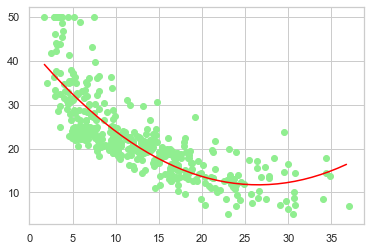

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
# Boston Housingデータ
X = X_train.loc[:, ['LSTAT']].values
# 目的変数
y = y_train.values
# モデルのインスタンス生成
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X_quad=poly.fit_transform(X)
X_fit=np.arange(X.min(),X.max(),1)[:,np.newaxis]
lr.fit(X_quad,y)
y_pred=lr.predict(poly.fit_transform(X_fit))

plt.scatter(X,y,color='lightgreen')
plt.plot(X_fit,y_pred,color='red')
plt.show()

## @ from sklean.pipeline import Pipeline
### pipe=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2),('lr',LogisticRegression(random_state=1)))])
### pipe.fit(X_train,y_train)
特徴量スケーリング、次元削減、学習の一連の流れをひとまとめにする。パラメータのチューニングはできないっぽいので、試しに使うのがいいかも  
pipe.fitでStandarScaler,PCAがfitとtransformメソッドを呼び出して、学習機にデータを渡してくれる。中身が謎なので少し気持ち悪い


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9766081871345029

# クロスバリデーション(分割交差検証)

## @ from sklearn.model_selection import KFold
### kfold=KFold(n_splits=10,shuffle=True,random_state=0)
### for train_id,test_id in kfold.split(X,y):
基本のK分割交差検証　n_splitsで分割数を指定。デフォルトは3で、10がいい説がある。shuffleで分割するindex番号を連番にするか決められる   
kfold.split(X,y)では分割したいデータ(普通は訓練データ)を入れて、訓練データと検証データのインデックス番号を変えすので注意。  
XがDataFrame,yがnumpy配列の場合は取り扱い注意

In [45]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

scores=[]
#Breast Cancer wisconsinのデータセット
for train_id,test_id in kfold.split(X_train,y_train):
    X_tr,X_val=X_train.iloc[train_id],X_train.iloc[test_id]
    y_tr,y_val=y_train[train_id],y_train[test_id]
    pipe.fit(X_tr,y_tr)
    score=pipe.score(X_val,y_val)
    scores.append(score)
print('CV validation accuracy:%s'% scores)
print('CV accuracy:%.3f +/- %.3f'% (np.mean(scores),np.std(scores)))

CV validation accuracy:[0.975, 1.0, 0.975, 0.975, 0.975, 0.975, 1.0, 0.95, 1.0, 1.0]
CV accuracy:0.982 +/- 0.016


## @ from sklearn.model_selection import StratifiedKFold
### skfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
### for train_id,test_id in skfold.split(X,y):
層化k分割交差検証 各分割データセットに均等に各クラスが分配されるようにしたもの。単純なk分割交差検証より評価が良い。  
使い方はKFoldと同じ

## @ from sklearn.model_selection import cross_val_score
### scores=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=kfold,n_jobs=-1)
クロスバリデーションの計算を簡単に行ってくれる便利なクラス。estimatorに使いたい分類器。X,yに訓練データセットを入れる。  
cvはデータの分割の方法(KFold,StratifiedKFoldなど)が入るがcv=10のように、整数値を入れるとデフォルトで層化k交差分割検証になり10分割する  
返り値は各分割での検証データの正解率のリスト,n_jobでCPUの個数。n_job=-1ですべてのCPUで並列処理

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

scores=cross_val_score(estimator=pipe,X=X_train,y=y_train,cv=kfold,n_jobs=-1)
print('CV validation accuracy:%s'% scores)
print('CV accuracy:%.3f +/- %.3f'% (np.mean(scores),np.std(scores)))

CV validation accuracy:[0.975 1.    0.975 0.975 0.975 0.975 1.    0.95  1.    1.   ]
CV accuracy:0.982 +/- 0.016


# 学習曲線

## @ from sklearn.model_selection import learning_curve
### train_size,train_scores,test_scores=learning_curve(estimator=model,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
訓練データ数に対する学習曲線を書くためのクラス。返り値は訓練データ数、訓練データの正解率、検証データの正解率。  
estimatorに分類器のインスタンス を入れる(model.fitを内部で行うので、ただインスタンス作るだけでよい).  
cvに交差分割検証の分割方法を入れる(kfold,statifiedKfold) 整数を入れると、デフォルトの層化k交差分割検証での分割数となる。  
np.linspace(0.1,1.0,10)とすれば、データセットを10等分する

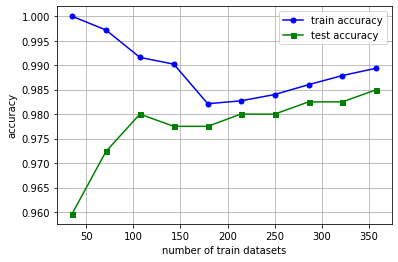

In [17]:
from sklearn.model_selection import learning_curve
# 学習器は標準化とPCAとLogisticRegressionをつなげたPipelineを使う。データはBreast Cancer
train_size,train_scores,test_scores=learning_curve(estimator=pipe,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
plt.plot(train_size,train_mean,color='blue',marker='o',markersize=5,label='train accuracy')
plt.plot(train_size,test_mean,color='green',marker='s',markersize=5,label='test accuracy')
plt.grid()
plt.xlabel('number of train datasets')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## @ from sklearn.model_selection import validaton_curve
### train_scores,test_scores=validation_curve(estimator=model,X=X_train,y=y_train,param_name='C',param_range=param_range,cv=10)
分類器のハイパーパラメータに対する学習曲線を描くためのクラス。返り値は訓練データの正解率と検証データの正解率なので注意する  
param_nameに分類器のハイパーパラメータの名前、param_rangeはパラメータの値を入れたリスト。cvに交差分割検証の方法。整数ならデフォルトの層化k交差分割検証の分割数になる。

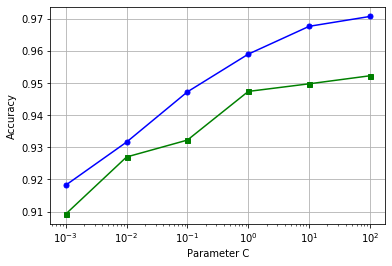

In [22]:
from sklearn.model_selection import validation_curve
# データはBreast Cancer
lr=LogisticRegression(penalty='l2',random_state=0)
param_range=[10**i for i in range(-3,3)]
train_scores,test_scores=validation_curve(estimator=lr,X=X_train,y=y_train,param_name='C',param_range=param_range,cv=10)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='train accuracy')
plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='test accuracy')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.show()

## @ from sklearn.model_selection import GridSearchCV
### gs=GridSearchCV(estimator=model,param_grid=param_dict,scoring='accuracy',cv=10,n_jobs=-1)
### gs=gs.fit(X_train,y_train) gs.best_params_ gs.best_estimator  gs.cv_results_
ハイパーパラメータを見つけるグリッドサーチを簡単に実装。要点としては、パラメータをまとめた辞書配列を作らなければいけないこと。
GridSeachCVのインスタンスを作ってから、学習を行う。ハイパーパラメータの評価は交差分割検証によって行われ、scoringの指標で決められる。何も指定しなければ、問題に適応した指標を使ってくれる
best_paramsメソッドで最もいいパラメータの組み合わせ、best_estimator_で最もいいパラメータの組み合わせのモデルを返す。　cv_resultsで一覧を表示

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svm=Pipeline([('sc',StandardScaler()),('svm',SVC(random_state=0))])
param_range=[10**i for i in range(-4,4)]
# ハイパーパラメータをまとめた辞書配列を作る。パラメータの部分は配列として入れる。pipelineの場合は識別機の名前__Cなどとしてアクセスする。
#グリッドサーチで1番大切な箇所
param_dict=[{'svm__C':param_range,'svm__kernel':['linear']},
            {'svm__C':param_range,'svm__gamma':param_range,'svm__kernel':['rbf']}]
# GridSeachCVのインスタンスを作成
gs=GridSearchCV(estimator=pipe_svm,param_grid=param_dict,scoring='accuracy',cv=10,n_jobs=-1)
# データはBreast Cancer
gs=gs.fit(X_train,y_train)
print('validation best accuracy:%.2f'% gs.best_score_)
display(pd.DataFrame(gs.cv_results_).iloc[:3])
model=gs.best_estimator_
model.fit(X_train,y_train)
print('test accuracy:%.2f' % model.score(X_test,y_test))

validation best accuracy:0.98


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,param_svm__gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010576,0.002910,0.002695,0.000781,0.0001,linear,NaN,"{'svm__C': 0.0001, 'svm__kernel': 'linear'}",0.625,0.625,...,0.625,0.650,0.625,0.625,0.650,0.625,0.631579,0.630653,0.009889,30
1,0.011363,0.003777,0.002599,0.001108,0.001,linear,NaN,"{'svm__C': 0.001, 'svm__kernel': 'linear'}",0.900,0.975,...,0.900,0.975,0.850,0.950,0.950,0.925,0.921053,0.929648,0.036902,24
2,0.004285,0.000635,0.001200,0.000398,0.01,linear,NaN,"{'svm__C': 0.01, 'svm__kernel': 'linear'}",0.925,0.975,...,0.925,0.975,0.950,0.975,0.975,0.950,1.000000,0.962312,0.022953,12


test accuracy:0.97


## 入れ子式の交差分割検証
### gs=GridSearchCV(estimator=model,param_grid=param_dict,cv=2,n_jobs=-1) 
### scores=cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)
このやり方は5×2交差検証。外側ループでデータを訓練データとテストデータに分け、内側ループでは訓練データと検証データに分け、検証データの指標でチューニングしたパラメータのモデルで、外側ループのテストデータの指標をだす。分類器の性能の比較の際に役に立つらしいが、、コスト高い。。。

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# SVM
from sklearn.svm import SVC
pipe_svm=Pipeline([('sc',StandardScaler()),('svm',SVC(random_state=0))])
param_range=[10**i for i in range(-4,4)]
param_dict=[{'svm__C':param_range,'svm__kernel':['linear']},
            {'svm__C':param_range,'svm__gamma':param_range,'svm__kernel':['rbf']}]
gs=GridSearchCV(estimator=pipe_svm,param_grid=param_dict,scoring='accuracy',cv=2,n_jobs=-1)
scores=cross_val_score(gs,X=X_train,y=y_train,scoring='accuracy',cv=5)
print('CV SVM test accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
# 決定木
from sklearn.tree import DecisionTreeClassifier
pipe_tree=Pipeline([('sc',StandardScaler()),('tree',DecisionTreeClassifier(random_state=0))])
param_range=[10**i for i in range(1,8)]
param_dict=[{'tree__max_depth':param_range}]
gs=GridSearchCV(estimator=pipe_tree,param_grid=param_dict,scoring='accuracy',cv=2,n_jobs=-1)
scores=cross_val_score(gs,X=X_train,y=y_train,scoring='accuracy',cv=5)
print('CV Tree test accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


CV SVM test accuracy: 0.985 +/- 0.015
CV Tree test accuracy: 0.907 +/- 0.017


# 性能評価指標

## @ 混合行列(Confusion Matrix)
### from sklearn.metric import confusion_matrix
### conf_mat=confusion_matrix(y_test,y_pred)
混合行列を作るクラス。混合行列は2値分類が基本だが、sklearnのconfusion matrixは他クラス分類にも対応している。正解ラベルと予測ラベルを入力するだけ

[[105   3]
 [  5  58]]


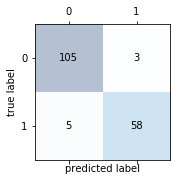

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# RandomForest データはBreast Cancer
forest=RandomForestClassifier(criterion='entropy',n_estimators=17,random_state=0)
forest.fit(X_train,y_train)

#　混合行列作成。(今回は2クラス分類)
y_pred=gs.predict(X_test)
confmat=confusion_matrix(y_test,y_pred)
print(confmat)

# 混合行列をきれいに表示する場合
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## @ 適合率(PRE)
### from sklearn.metrics import precision_score
陽性クラスと予測したサンプルのうち、実際に陽性クラスだったもの。インフルの検査で、インフルと診断された人のうち、ほんとにインフルにかかってた人の割合

## @ 再現率(REC)
### from sklearn.metrics import recall_score
陽性クラスのうち、陽性クラスと正しく予測された数。インフル患者のうち、正しくインフルと診断された人の数

## @ F1値
### from sklearn.metrics import f1_score
PREとRECを組み合わせた指標。調和平均。

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision: %.3f' % precision_score(y_test,y_pred))
print('recall: %.3f' % recall_score(y_test,y_pred))
print('f1 score: %.3f' % f1_score(y_test,y_pred))

precision: 0.951
recall: 0.921
f1 score: 0.935


## @ AUC ROCの曲線下面積
### from sklearn.metrics import roc_auc_score
### roc_acu_score(y_test,y_pred)
AUCの値を見ると、不均衡なクラスのサンプルに対する分類器の性能を見ることができる。90個が1で10が0のデータですべて1と分類した分類器の正解率が90%になってしまって、見かけ上はよくても、性能はごみの場合に役に立つ

In [7]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=100,random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
# データはBreast Cancer
print('ROC AUC:%.3f' % roc_auc_score(y_test,y_pred))
print('Accuracy:%.3f' % accuracy_score(y_test,y_pred))
# クラスの偏り。そこまでないから正解率とあまり変わらない
print(np.bincount(y))

ROC AUC:0.964
Accuracy:0.959
[357 212]


## 残差プロット
回帰モデルを作成した際のモデルの性能をグラフから読み取ることができる。予測が良いほど、残差は0に近づくが現実的には不可能  
よい回帰モデルの場合は誤差がランダムに分布して、残差が中央の周りにランダムに散らばる。  
下の例では、右上に直線に並んだ規則的なデータが見られ、モデルが何らかの情報を補足できていないことを表す。  
つまり、残差プロットから規則性の存在を確認でき、外れ値も検出することが可能となる。

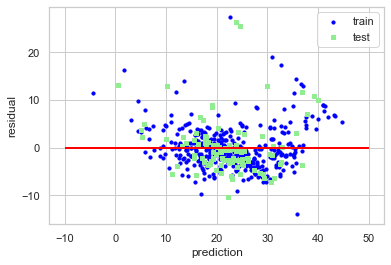

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Boston Housingデータ
lr.fit(X_train,y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

sns.set(style='whitegrid',context='notebook')
plt.scatter(y_train_pred,y_train-y_train_pred,color='blue',marker='o',s=10,label='train')
plt.scatter(y_test_pred,y_test-y_test_pred,color='lightgreen',marker='s',s=10,label='test')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,colors='red')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.legend()
plt.show()

## 平均二乗誤差(MSE)
Mean Squared Error
$$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y^i-\hat{y}^i) \quad
$$
回帰モデルの性能評価に使われ、グリッドサーチや、交差分割検証に使う指標として役立つ。
## @ from sklearn.metrics import mean_squared_error
### MSE=mean_squared_error(y_train,y_pred)

In [33]:
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print('train MSE: %.3f' % mean_squared_error(y_train,y_train_pred))
print('test MSE: %.3f' % mean_squared_error(y_test,y_test_pred))

train MSE: 19.326
test MSE: 33.449


## 決定係数
回帰モデルの性能をより効果的に解釈できる、標準化された平均二乗誤差と考えることがきる。  
最も性能のいい状態がMSEが0なのに対して、決定係数R^2の場合は1になる
## @ from sklearn.metrics import r2_score

In [34]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print('train MSE: %.3f' % r2_score(y_train,y_train_pred))
print('test MSE: %.3f' % r2_score(y_test,y_test_pred))

train MSE: 0.773
test MSE: 0.589


# 分類器

## @ from sklearn.linear_model import Perceptron
### ppn=Perceptron(eta0=0.1,random_state=0,shuffle=True)
単純パーセプトロン　ハイパーパラメータ}は学習係数eta　shuffle=Trueで各epochごとにデータをシャッフルする

## @ from sklearn.metrics import accuracy_score
### accuracy_score(y_test,y_pred)
正解ラベルと予測ラベルから正解率を求める

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

ppn=Perceptron(eta0=0.1,random_state=0,shuffle=True)
ppn.fit(X_train_std,y_train)
y_pred=ppn.predict(X_test_std)

# accuracy_scoreを使う場合
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

# modelのscoreメソッドを使う場合
print("Accuracy: %.2f" % ppn.score(X_test_std,y_test))

Accuracy: 0.93
Accuracy: 0.93


## @ from sklearn.linear_model import LogisticRegression
### lr=LogisticRegression(C=0.01,random_state=0,penalty='l2')
ロジスティック回帰　ハイパーパラメータCは正則項の逆数で、Cが小さいほど正則化は強くなる  
penaltyでL1,L2,ElasticNetを選択できる。デフォルトはl2


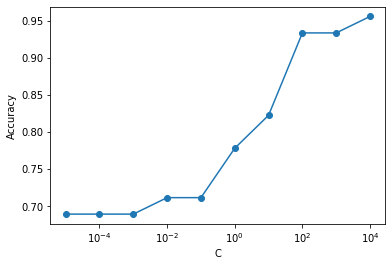

In [33]:
from sklearn.linear_model import LogisticRegression


accuracy=[]
params=[]
for c in range(-5,5):
    lr=LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    accuracy.append(lr.score(X_test_std,y_test))
    params.append(10**c)

plt.plot(params,accuracy,marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()


## @ from sklearn.svm import SVC
### svm=SVC(kernel='linear',C=1.0,random_state=0)
### svm=SVC(kernel='rbf',gammma=10,C=1.0,random_state=0)
サポートベクターマシン。kernel='linear'で線形分離、kernel='rbf'で非線形分離を行なう。Cはスラック変数の係数、gammmaカーネル関数の係数  
正則化項はL2正則化のみ

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

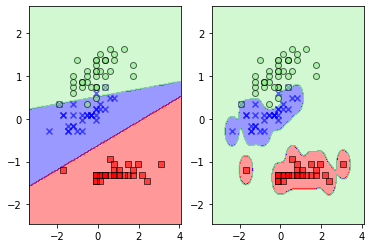

In [81]:
from sklearn.svm import SVC

plt.subplot(1,2,1)
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=svm)

plt.subplot(1,2,2)
svm=SVC(kernel='rbf',C=10.0,gamma=15,random_state=0)
svm.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=svm)
plt.show()

## @ from sklearn.svm import linearSVC
### liSVM=LinearSVC(penalty='l1',C=10,dual=False)
SVMの強化版？L1正則化を設定できるようになった

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


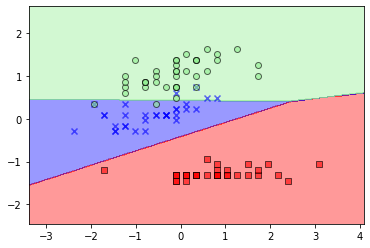

In [8]:
from sklearn.svm import LinearSVC
liSVM=LinearSVC(penalty='l1',C=10,dual=False)
liSVM.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=liSVM)
plt.show()

## 実験　L1正則化の重み減少の様子

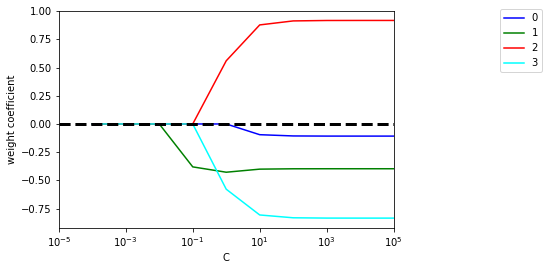

In [16]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LinearSVC(penalty='l1', C=10.**c,dual=False, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=column,
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## @ from sklearn.tree import DecisionTreeClassifier
### tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
決定木一つ。criterionが不順度の指標'gini'か'entropy'。max_depthが決定木の深さ。  
決定木で学習する訓練データは特徴量をスケーリングする必要がない（してもいいが、数値の分割条件の大小関係が重要なので、しきい値が変わるだけ）

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


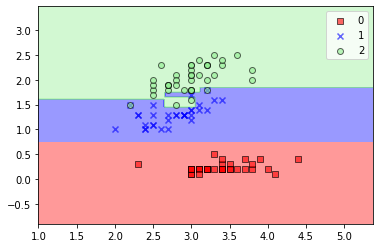

In [94]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=0)
tree.fit(X_train[:,[1,3]],y_train)
plot_decision_regions(X_train[:,[1,3]],y_train,classifier=tree)
plt.legend()
plt.show()

## @ from sklearn.ensemble import RandomForestClassifier
### forest=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=2)
ランダムフォレスト。criterionが不順度の指標'gini'か'entropy'　n_estimatorsが決定木の数。n_jobsがPCの複数コアでの並列処理をしている。   
### importance=forest.feature_importances_
### indices=np.argsort(importances)[::-1]
ランダムフォレストで重要な特徴量を識別する。配列を返す。決定木から計算された不順度の平均的な減少量として重要度を測定できる  
indicesで重要な特徴量のインデックス番号を取得する

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


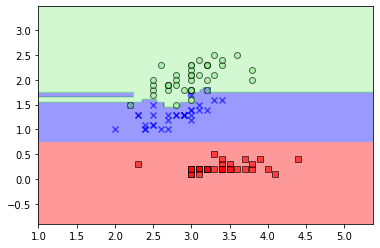

test accuracy 0.93
[0.14334485 0.0264803  0.40058315 0.42959169]


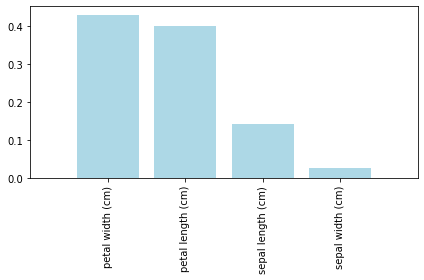

In [26]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestでの2変数での分類の可視化
forest=RandomForestClassifier(criterion='gini',n_estimators=10,random_state=0,n_jobs=2)
forest.fit(X_train[:,[1,3]],y_train)
plot_decision_regions(X_train[:,[1,3]],y_train,classifier=forest)
plt.show()
print("test accuracy %.2f" %forest.score(X_test[:,[1,3]],y_test))

# RandomForestで重要な特徴量を識別
forest=RandomForestClassifier(criterion='gini',n_estimators=10,random_state=0,n_jobs=2)
forest.fit(X_train,y_train)
importaces=forest.feature_importances_
print(importaces)
indices=np.argsort(importaces)[::-1]
feat_labels=np.array(iris['feature_names'])

plt.bar(range(X_train.shape[1]),importaces[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()


## @ from sklearn.feature_selection import SelectFromModel
### sfm=SelectFromModel(estimator=forest,prefit=True,threshold=0.15)
### X_selected=sfm.transform(X_train)
識別機(多くの場合ランダムフォレスト)が分類したしきい値thereshold以上の重要な特徴量のみを取得する 
### mask=sfm.get_support()
### importance=feat_label[mask]
get_support()メソッドで、しきい値以上の特徴量のbool配列を返す

In [35]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(estimator=forest,threshold=0.15,prefit=True)
print(X_train[:3])
X_selected=sfm.transform(X_train)
print(X_selected[:3])

mask=sfm.get_support()
print(feat_labels[mask])

[[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]]
[[3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]]
['petal length (cm)' 'petal width (cm)']


## @ from sklearn.neighbors import KNeighborsClassifier
### knn=KNeighborsClassifer(n_neightbors=5,p=2,metric='minkowski')
K近傍法(k-nearest-neighbor) n_negibors分類したいサンプルの最近傍のデータ数 k(デフォルトは5)、pはminkowski距離を用いる場合の次元を表す。  
p=2でユークリッド距離に対応する  
minkowski距離はユークリッド距離とマンハッタン距離を一般化した距離指標  
k-nearest-neighborは訓練データの中から分類したいデータ点に最も近いk個のサンプルを見つけ出し、k個の最近傍の多数決で決まる。  
そのため、データを保存しておく必要があり、メモリ問題が起きる場合がある。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


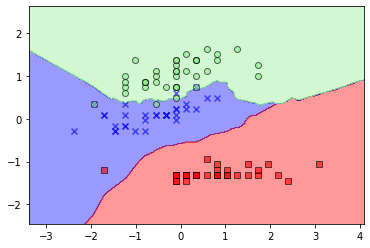

test accuracy 0.80


In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=knn)
plt.show()
print("test accuracy %.2f" %knn.score(X_test_std[:,[1,3]],y_test))

## 回帰モデル

## @ from sklearn.linear_model import LinearRegression
### lr=LinearRegression(fit_intercept=True, normalize=False, n_jobs=1))
基本の線形回帰モデル。精度はよくないが、シンプルなのでデータの線形分離可能性を知るのには便利。　　
fit_intercept、False に設定すると切片を求める計算を含めない。目的変数が原点を通るなら利用可能。normalizeでデータを正規化するか決めれる。  
回帰全般に言えることだが、データの標準化は説明変数だけでなく、目的変数にも行う必要がある

train MSE: 0.5029199902156156


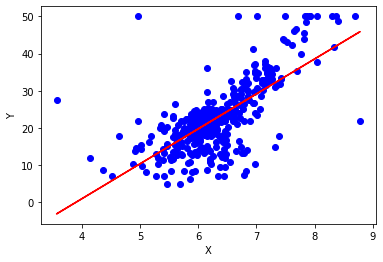

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
# 線形分離の様子を実感するために、特徴量を一つで学習してみる。
# Boston housing
X=X_train[['RM']].values
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y_train[:,np.newaxis]).flatten()

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_std,y_std)

y_pred=lr.predict(X_std)
print('train MSE:',mean_squared_error(y_std,y_pred))
# 標準化した値をもとに戻す
X=sc_x.inverse_transform(X_std)
Y=sc_y.inverse_transform(y_std)
Y_pred=sc_y.inverse_transform(y_pred)
# 線形分離の様子を可視化
plt.scatter(X,Y,color='blue')
plt.plot(X,Y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## @ from sklearn.linear_model import RANSACRegressor
### ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,residual_metrics=lambda x:np.sum(np.abs(x),axis=1),residual_threshold=5.0,random_state=0
### ransac.fit(X,y)
RANSACはロバスト回帰モデル（外れ値の影響を抑えた上で回帰を実行する手法のこと）で回帰モデルに対して、正常値を学習させる.  
max_trialsでイテレーションの回数、min_samplesでランダムに選択されるサンプルの最小数、residual_metricsで学習直線に対する縦の線の距離の絶対値を計算。 residual_thresholdで縦の距離が5以下のサンプル点が正常値に含まれるようにする。    
RANSACの精度はしきい値の適切な判断によるので、トライアンドエラーが必要になる。
RANSACは、あくまで外れ値の影響をなくして、正常なサンプルを回帰モデルが学習できるようにするアルゴリズムなため、モデルではないことに注意  

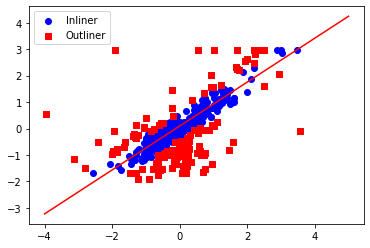

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
# 可視化の都合上、特徴量を一つで学習してみる。
# Boston housing
X=X_train[['RM']].values
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y_train[:,np.newaxis]).flatten()

from sklearn.linear_model import RANSACRegressor,LinearRegression
lr=LinearRegression()
ransac=RANSACRegressor(lr,max_trials=100,min_samples=50,residual_threshold=0.5,random_state=0)
ransac.fit(X_std,y_std)
inliner_mask=ransac.inlier_mask_
outliner_mask=np.logical_not(inliner_mask)

line_X=np.arange(-4,6,1)
line_Y=ransac.predict(line_X[:,np.newaxis])
plt.scatter(X_std[inliner_mask],y_std[inliner_mask],c='blue',marker='o',label='Inliner')
plt.scatter(X_std[outliner_mask],y_std[outliner_mask],c='red',marker='s',label='Outliner')
plt.plot(line_X,line_Y,color='red')
plt.legend()
plt.show()

## 決定木回帰
分類モデルでのノードの不純度指標であるエントロピーを平均二乗誤差MSEに置き換えたもの
## from sklearn.tree import DecisionTreeRegressor
### tree = DecisionTreeRegressor(max_depth=3)
分類モデルと同様、決定木の深さmax_depthをチューニングする必要がある

{'max_depth': 70}


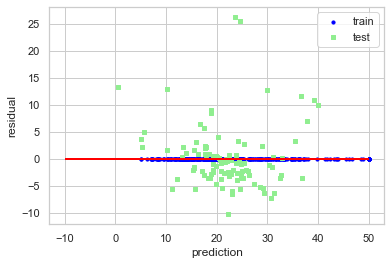

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
# 決定木回帰モデルを作成
tree=DecisionTreeRegressor()
# パラメータチューニング
grid_dict=[{'max_depth':[2*i for i in range(1,100)]}]
gs=GridSearchCV(estimator=tree,param_grid=grid_dict,scoring='r2',cv=10)
gs.fit(X_train,y_train)
print(gs.best_params_)

clf=gs.best_estimator_
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
# 訓練データに極度に過学習している
plt.scatter(y_train_pred,y_train-y_train_pred,color='blue',marker='o',s=10,label='train')
plt.scatter(y_test_pred,y_test-y_test_pred,color='lightgreen',marker='s',s=10,label='test')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,colors='red')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.legend()
plt.show()

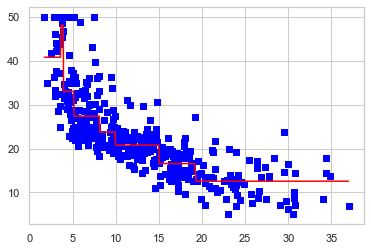

In [85]:
X=X_train[['LSTAT']].values
y=y_train.values
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
y_pred=tree.predict(X)
# Xの要素の大きい順にindex番号を取得
sort_idx=X.flatten().argsort()
plt.scatter(X[sort_idx],y[sort_idx],color='blue',marker='s')
plt.plot(X[sort_idx],y_pred[sort_idx],color='red')
plt.show()

## ランダムフォレスト回帰
分類モデルのランダムフォレストの決定木の成長に平均二乗誤差を使用したもの
## from sklearn.ensemble import RandomForestRegressor
### forest=RandomForestRegressor(n_estimator=1000,criterion='mse',random_state=1,n_jobs=01)
回帰モデルなので、決定木の成長指標criterionは平均二乗誤差MSEを使う必要があるのに注意。パラメータは分類器の場合と同じ

MSE train:7.140, test:39.642
R^2 train:0.916, test:0.521


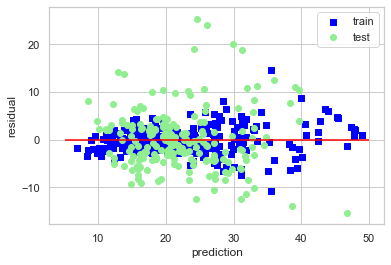

In [123]:
from sklearn.metrics import mean_squared_error,r2_score
# Boston Housingデータ
X=df[['LSTAT']].values
y=df['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
print('MSE train:%.3f, test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f, test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

plt.scatter(y_train_pred,y_train-y_train_pred,color='blue',marker='s',label='train')
plt.scatter(y_test_pred,y_test-y_test_pred,color='lightgreen',marker='o',label='test')
plt.hlines(y=0,xmin=5,xmax=50,color='red')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.legend()
plt.show()

## SVM回帰器
分類器としてのSVMを簡単に回帰モデルとして使用できる。
## from sklearn.svm import SVR
### svm=SVR(kernel='rbf',C=0.01,gamma=0.1)
分類器のSVMはSVC(Classifier)で呼びだしたが、回帰の場合はSVR(Regressor)で呼び出す。ありがたいことに、パラメータは分類器と同じで、非線形分離するためにカーネル化するのに、kernelを'rbf'とすればよい。linear,rbf,polyのいずれか。

MSE: 46.659,R^2:0.447 (linear)
MSE: 27.366,R^2:0.676 (kernel)


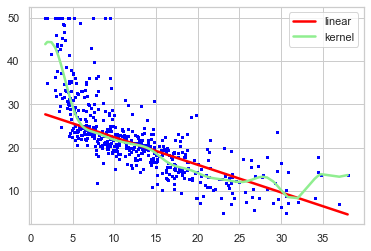

In [153]:
from sklearn.metrics import mean_squared_error,r2_score
# Boston Housingデータ

X=df[['LSTAT']].values
y=df['MEDV'].values
# SVM回帰モデルを作成。すでにチューニングしたパラメータを使う。
from sklearn.svm import SVR
svm_linear=SVR(kernel='linear',C=1e-3)
svm_kernel=SVR(kernel='rbf',C=10,gamma=0.1)

for reg,label,color in zip([svm_linear,svm_kernel],['linear','kernel'],['red','lightgreen']):
    reg.fit(X,y)
    y_pred=reg.predict(X)
    print('MSE: %.3f,R^2:%.3f (%s)' % (mean_squared_error(y,y_pred),r2_score(y,y_pred),label))
    sort_idx=X.flatten().argsort()
    plt.scatter(X[sort_idx],y[sort_idx],color='blue',marker='s',s=4)
    plt.plot(X[sort_idx],y_pred[sort_idx],color=color,lw=2.5,label=label)
plt.legend()
plt.show()

## 正則化を用いた線形回帰モデル

## リッジ(Ridge)回帰
## @ from sklearn.linear_model import Ridge
### ridge=Ridge(alpha=1.0)
いわゆるL2正則化項(重みの平方和)を損失関数の二乗誤差に足し合わせた線形回帰モデル。  
alphaが正則化項の係数を表すハイパーパラメータの調整が必要

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
# リッジ回帰モデルを作成
ridge=Ridge()
# L2ペナルティ項の係数をグリッドサーチ
param_range=[10**i for i in range(-3,3)]
grid_dict={'alpha':param_range}
gs=GridSearchCV(estimator=ridge,param_grid=grid_dict,scoring='r2',cv=10,n_jobs=-10)
gs.fit(X_train,y_train)
print(gs.best_params_)
clf=gs.best_estimator_

y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print('train R2:%.3f' % r2_score(y_train,y_train_pred))
print('test R2:%.3f' % r2_score(y_test,y_test_pred))

{'alpha': 0.1}
0.7308450284527686
train R2:0.773
test R2:0.588


## ラッソ(LASSO)回帰
いわゆるL1正則化項を二乗誤差に加えた線形回帰モデル。特徴量の数を減らすことができるので、教師あり特徴量選択として使うこともできる。  
LASSOはサンプル数より特徴量数のほうが大きい場合、特徴量数を選択する制約がある。
## @ from sklearn.linear_model import Lasso
### lasso=Lasso(alpha=1.0)

In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
param_range=[10**i for i in range(-3,3)]
grid_dict={'alpha':param_range}
gs=GridSearchCV(estimator=lasso,param_grid=grid_dict,scoring='r2',cv=10,n_jobs=-10)
gs.fit(X_train,y_train)
print(gs.best_params_)
clf=gs.best_estimator_

y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print('train R2:%.3f' % r2_score(y_train,y_train_pred))
print('test R2:%.3f' % r2_score(y_test,y_test_pred))

{'alpha': 0.001}
train R2:0.773
test R2:0.589


## Elastic Net
L1正則化項とL2正則化項、両方加えたRidgeとLassoの合わせ技。
## from sklearn.linear_model import ElasticNet
### elasticnet=ElasticNet(alpha=1.0,l1_ratio=0.5)
alphaはL1正則化項の係数の大きさ、l1_ratioはL2正則化項とL1正則化項との大きさの比較。1.0の時にL2正則化項はなくなり、LASSOと等しくなる

In [59]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
param_range=[10**i for i in range(-3,3)]
grid_dict=[{'alpha':param_range,'l1_ratio':[i for i in np.linspace(0.1,1,10)]}]

gs=GridSearchCV(estimator=elasticnet,param_grid=grid_dict,scoring='r2',n_jobs=-1,cv=10)
gs.fit(X_train,y_train)
print(gs.best_params_)
clf=gs.best_estimator_

y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print('train R2:%.3f' % r2_score(y_train,y_train_pred))
print('test R2:%.3f' % r2_score(y_test,y_test_pred))

{'alpha': 0.001, 'l1_ratio': 0.9}
train R2:0.773
test R2:0.588


# 次元削減

## @ from sklearn.decomposition import PCA
### pca=PCA(n_components=2)  pca.fit(X_train_std)  
### pca.transform(X_train_std) pca.transform(X_test_std)
PCAを超簡単に行なうクラス。n_componentsに選択する特徴量の数を指定。Noneにすると、pca.explained_variance_ratio_ですべての固有値の分散説明率にアクセスできる。
### PCAでは必ず標準化させたデータを用いる

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


std before: 2       3.598618
3       4.190476
4      24.769334
5     366.558262
6       0.013916
7       0.051031
8       0.078154
9       0.039216
10      0.028057
11      0.006861
12      0.293965
13      0.551973
14      2.109921
15     49.830675
16      0.002861
17      0.016835
18      0.028576
19      0.005862
20      0.008181
21      0.002638
22      4.965170
23      6.147466
24     34.460647
25    597.853882
26      0.022989
27      0.153653
28      0.193250
29      0.065688
30      0.063439
31      0.017957
dtype: float64
std after: 1.0
pca before: (398, 30)
pca after: (398, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


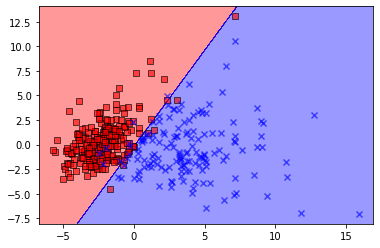

train accuracy with pca:0.96
test accuracy with pca:0.94
train accuracy with std:0.99
test accuracy with std:0.98


array([4.36893153e-01, 1.94151626e-01, 9.66154484e-02, 6.71661075e-02,
       5.49883033e-02, 4.01225718e-02, 2.18306816e-02, 1.48922601e-02,
       1.37410827e-02, 1.10137130e-02, 1.04826288e-02, 9.16214247e-03,
       7.66306051e-03, 5.14226331e-03, 3.19635178e-03, 2.51968451e-03,
       1.92415148e-03, 1.65844223e-03, 1.49026749e-03, 1.06777316e-03,
       1.01725216e-03, 8.48954816e-04, 7.43492725e-04, 5.81295611e-04,
       5.44222785e-04, 2.53545469e-04, 2.14385701e-04, 4.62967124e-05,
       2.51158320e-05, 3.72534805e-06])

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 必ずPCAにかけるデータは標準化させる
print("std before:",X_train.std())
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
print("std after:",X_train_std.std())

print("pca before:",X_train_std.shape)
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print("pca after:",X_train_pca.shape)

# ロジスティック回帰で試してみる
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.show()

#　PCAで過学習は収まったが、テストデータの正解率はむしろ悪くなった..
print("train accuracy with pca:%.2f" % lr.score(X_train_pca,y_train))
print("test accuracy with pca:%.2f" % lr.score(X_test_pca,y_test))

lr.fit(X_train_std,y_train)
print("train accuracy with std:%.2f" % lr.score(X_train_std,y_train))
print("test accuracy with std:%.2f" % lr.score(X_test_std,y_test))

pca=PCA(n_components=None)
pca.fit(X_train_std)
pca.explained_variance_ratio_

## @ from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
### lda=LDA(n_components=2)  X_train_lda=lda.fit_transform(X_train_std,y_train)
次元削減のLDAを簡単に実装。前提条件が  
・データが正規分布に従う  
・クラスの共分散行列が全く同じ  
・特徴量が統計的に互いに独立していること  
なので、使用するには制約が厳しい.満たしてなくても、うまくいくらしい  

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)
print("lda before:",X_train.shape)
print("lda after:",X_train_lda.shape)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_lda,y_train)

#　PCAに比べると精度は上がる。
print("train accuracy with lda:%.2f" % lr.score(X_train_lda,y_train))
print("test accuracy with lda:%.2f" % lr.score(X_test_lda,y_test))

lr.fit(X_train,y_train)
print("train accuracy:%.2f" % lr.score(X_train,y_train))
print("test accuracy:%.2f" % lr.score(X_test,y_test))


lda before: (105, 4)
lda after: (105, 2)
train accuracy with lda:0.94
test accuracy with lda:0.84
train accuracy:0.94
test accuracy:0.89


## @ from sklearn.decomposition import KernelPCA
### kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
kernel PCAでの次元削減を非常に簡単に使える。kernelは2'linear''poly''rbf''sigmoid''cosine''precomputed'  
gammaはハイパーパラメータになるので、チューニングする必要がある。n_componentで返す特徴量の数

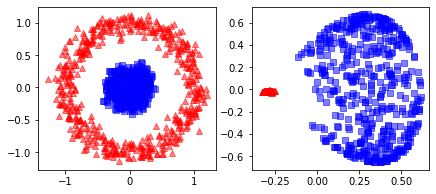

train accuracy without pca:0.00
test accuracy without pca:-0.01
train accuracy with pca:0.88
test accuracy with pca:0.87


In [10]:
# 線形分離不可能なデータセットを作成
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)

from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_kpca=kpca.fit_transform(X)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X[y==1,0],X[y==1,1],color='blue',marker='s',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='s',alpha=0.5)
plt.show()

# ロジスティクス回帰が非線形分離できない実験
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print('train accuracy without pca:%.2f' % lr.score(X_train,y_train))
print('test accuracy without pca:%.2f' % lr.score(X_test,y_test))

X_train,X_test,y_train,y_test=train_test_split(X_kpca,y,test_size=0.2,random_state=0)
lr.fit(X_train,y_train)
print('train accuracy with pca:%.2f' % lr.score(X_train,y_train))
print('test accuracy with pca:%.2f' % lr.score(X_test,y_test))

# アンサンブル学習

## スタッキング
## @ from sklearn.ensemble import VotingClassifier
### vclf=VotingClassifier(estimator=[('clf1',clf1),('clf2',clf2),('clf3',clf3)],voting='hard'
アンサンブル学習器のインスタンスを作成し、通常の学習器と同じように扱える。estimatorに学習器の名前とインスタンスのリストを入れる。voting='hard'の場合は単純に多数決で最も多いラベルを正解にするという、シンプルなやり方。voting='soft'は各学習機の予測確率の和をとって、最大となるクラスを正解にするやり方。  
VotingClasiffierをやれば単純に正解率が上がるかと言われると、微妙なので、グリッドサーチして一つの分類器の精度を高めて、後でダメ押しにやるのがよさそう

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)

lr=LogisticRegression(penalty='l2',C=100,random_state=0)
svm=SVC(kernel='rbf',C=100,gamma=10,random_state=0)
tree=DecisionTreeClassifier(max_depth=10)
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

from sklearn.ensemble import VotingClassifier
estimators=[('lr',lr),('svm',svm),('tree',tree),('knn',knn)]
vclf=VotingClassifier(estimators=estimators,voting='hard')

for clf,label in zip([lr,svm,tree,knn,vclf_hard,vclf],['LogisticRegression','SVM','DecisionTreeClassifier','KNeighborsClassifier',
                                                            'VotingClassifier']):
        scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='accuracy')
        print("Accuracy:%.3f +/- %.3f %s" %(scores.mean(),scores.std(),label))



Accuracy:0.953 +/- 0.047 LogisticRegression
Accuracy:0.887 +/- 0.071 SVM
Accuracy:0.942 +/- 0.065 DecisionTreeClassifier
Accuracy:0.965 +/- 0.057 KNeighborsClassifier
Accuracy:0.954 +/- 0.060 VotingClassifier


## バギング
元の訓練データからランダムにn個のデータを重複を許して抽出することを繰り返してデータセットをn_estimators個作る。これをブートストラップという。作成した各データそれぞれに対してモデルを作成。予測はこの多数のモデルを集約して予測。結果の集約は分類であれば多数決、回帰であれば平均値を取る。
## @ from sklearn.ensemble import BaggingClassifier 
### bagBaggingClassifier(base_estimator=tree,n_estimators=500,max_samples=1.0,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1,random_state=0)
max_samplesにintを与えると、サンプル数の絶対数を指定。floatを入れると、割合を指定。base_estimatorで分類器を一つ指定する。VotingClassifierとは異なり、一つの種類の分類器をたくさん作るやり方。なので、グリッドサーチでパラメータチューニングした分類器を作って、ダメ押しで使うのがよさそう。

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# 基底分類器を作成
tree=DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=0)
# バギングアンサンブルのインスタンスを作成。
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=tree,n_estimators=500,max_samples=1.0,max_features=1.0,random_state=0)

for clf,label in zip([tree,bag],['tree','bagging']):
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    print('accuracy train:%.3f +/- %.3f (%s)' %(accuracy_score(y_train,y_train_pred).mean(),accuracy_score(y_train,y_train_pred).std(),label))
    print('accuracy test:%.3f +/- %.3f (%s)' %(accuracy_score(y_test,y_test_pred).mean(),accuracy_score(y_test,y_test_pred).std(),label))

accuracy train:1.000 +/- 0.000 (tree)
accuracy test:0.936 +/- 0.000 (tree)
accuracy train:1.000 +/- 0.000 (bagging)
accuracy test:0.959 +/- 0.000 (bagging)


## ブースティング (AdaBoost)
訓練データに対しモデルを作成し、学習。学習後、予測と正解を比較し、誤ったデータに重み付けをして、重み付けしたデータを用いて新たなモデルで学習。そして誤ったデータに、、、と繰り返し逐次的にモデルを作成していくことで、誤ったデータにモデルを対応させる。訓練データに過度に適応して過学習する危険性もあるので、気を付ける
## @ from sklearn.ensemble import AdaBoostClassifier
### ada=AdaBoostClassifer(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state=0)
基本的な使い方はBaggingClassifierと同じ。1つの分類器に対してたくさんモデルを作るやり方

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
# 基底分類器を作成
tree=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
# Boostingインスタンスを作成
ada=AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state=0)

for clf,label in zip([tree,ada],['tree','adaboost']):
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    print('accuracy train:%.3f +/- %.3f (%s)' %(accuracy_score(y_train,y_train_pred).mean(),accuracy_score(y_train,y_train_pred).std(),label))
    print('accuracy test:%.3f +/- %.3f (%s)' %(accuracy_score(y_test,y_test_pred).mean(),accuracy_score(y_test,y_test_pred).std(),label))

accuracy train:0.992 +/- 0.000 (tree)
accuracy test:0.936 +/- 0.000 (tree)
accuracy train:1.000 +/- 0.000 (adaboost)
accuracy test:0.959 +/- 0.000 (adaboost)


## 勾配ブースティング
## from sklearn.ensemble import GradientBoostingRegressor
### gbr=GradientBoostingRegressor(n_estimators=500,max_depth=100,max_features1.0,min_samples_leaf)
回帰決定木を順次作って、損失関数（デフォルトは二乗誤差）を最小にする分類器（基底分類器を指定できないので、ランダムフォレストのように一つの分類器と言ってしまってよさそう）パラメータがチューニングが大切になるので、グリッドサーチは必須  
パラメータのチューニングは、まずは少ない分類器の数で、学習率以外のパラメータをチューニングして、ベストなパラメータを用意してからたくさんの分類器の数で学習率をチューニングする

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc=GradientBoostingClassifier(n_estimators=500)

# 推奨されているパラメータのチューニング方法
parameters = {'learning_rate' : [0.1, 0.05, 0.02, 0.01], 
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1]}

gs = GridSearchCV(estimator=gbc,param_grid=parameters, n_jobs=-1, cv=4)

# データはBreast Cancer 
gs.fit(X_train, y_train)
print("best score=", gs.best_score_)

# 学習率をたくさんの分類器の数でチューニング
clf = gs.best_estimator_
clf.set_params(n_estimators=100000)
parameters = {'learning_rate' : [0.1, 0.05, 0.02, 0.01]}
gs = GridSearchCV(clf, parameters, n_jobs=-1, cv=4)
gs.fit(X_train, y_train)
print("best score=", gs.best_score_)

best score= 0.964824120603015
best score= 0.9623115577889447


##  XGBoost
kaggleやるならこれを知らないとにわか扱いされる。sklearnのライブラリではないが、sklearn同様のインターフェイスで扱えるAPIがある。  
GradientBoostingRegressorと基本的なことは同じ。処理が高速に、精度もあげることができた手法。
### import xgboost as xgb
### dm_train=xgb.DMatrix(X_train,label=y_train)  model=xgb.train(param,dm_train)  xgb.plot_importance(model)
### clf=xgb.XGBRegressor() clf.fit(X_train,y_trian)
XGBoostに入れるデータはDMatrixに変換しないといけないので気を付ける。予測するデータはlabelはなくてもよい。parameteをまとめた辞書型リストをあらかじめ作成する必要がある。plot_importanceで、重要な特徴量を表示することができる  
XGBRregression()でsklearnのインターフェイスでモデルを扱えるようになる。  
xgboostは回帰モデルなので、predictした返り値はクラスに所属する確率を返す。2値分類ならnp.where(y_pred>0.5,1,0)でクラスに変換する必要がある。

train Accuracy: 1.000
test Accuracy: 0.971


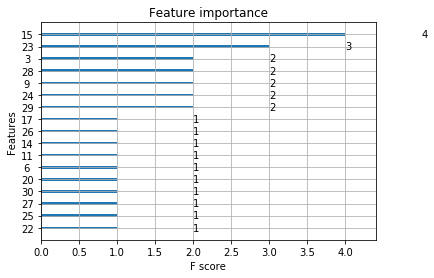

In [26]:
# XGboostお基本の書き方

import xgboost as xgb
# データはBreast Cancer 
dm_train=xgb.DMatrix(X_train,label=y_train)
dm_test=xgb.DMatrix(X_test,label=y_test)
param={'max_depth':2,'eta':1,'objective':'binary:logistic'}
model=xgb.train(param,dm_train)
y_train_pred=model.predict(dm_train)
y_test_pred=model.predict(dm_test)

accuracy_train = sum(((y_train_pred > 0.5) & (y_train == 1)) | ((y_train_pred <= 0.5) & (y_train == 0))) / len(y_train_pred)
accuracy_test = sum(((y_test_pred > 0.5) & (y_test == 1)) | ((y_test_pred <= 0.5) & (y_test == 0))) / len(y_test_pred)

print('train Accuracy: %.3f' % accuracy_train)
print('test Accuracy: %.3f' % accuracy_test)

xgb.plot_importance(model)
plt.show()

[13:37:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train MSE:-0.047
row predict [ 0.9590241   0.05433872  0.0157401   0.0757221  -0.02125484]
class predict [1 0 0 0 0]
test accuracy: 0.959


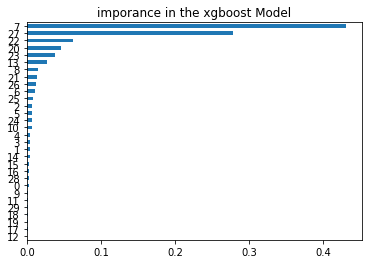

In [62]:
# sklearnのインターフェイスでかけるAPIを使用する場合
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# sklearnのようにモデルを作成し、sklearnのモデルと同じような操作を行える。データの変換を行う必要もないので、このやり方でいい気がする。
model = xgb.XGBRegressor()
# 通常のグリッドサーチと同じようにパラメータを探索
# xgboostの内部では回帰分析を行っているため、クラス分類の場合は、確率を返す。性能指標は回帰用のMSEを用いる
params={'max_depth':[3,5,10],'learning_rate':[0.05,0.1],'max_depth':[3,5,10,100]}
gs=GridSearchCV(estimator=model,param_grid=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)
print('train MSE:%.3f' % gs.best_score_)

model=gs.best_estimator_
y_pred=model.predict(X_test)
print('row predict',y_pred[:5])
y_pred_bi=np.where(y_pred>0.5,1,0)
print('class predict',y_pred_bi[:5])
print("test accuracy: %.3f" % accuracy_score(y_test,y_pred_bi))

# 重要な特徴量を取り出す。
importances = pd.Series(model.feature_importances_)
importances = importances.sort_values()
importances.plot(kind = "barh")
plt.title("imporance in the xgboost Model")
plt.show()

In [56]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [46]:
y_pred=model.predict(X_test)
y_pred_binary=np.where(y_pred>0.5,1,0)
accuracy_score(y_test,y_pred_binary)

0.9590643274853801

In [53]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')